Check out the [description](https://github.com/sammitjain/loksabha-questions) for some more context about the datasets. I'm choosing to go with the flattened version for this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from statistics import mean
import textwrap

In [2]:
# Load the questions dataset
questions = pd.read_csv("/kaggle/input/lok-sabha-questions/questions_flattened.csv")

In [3]:
# General information
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 8035 non-null   int64 
 1   topic              8035 non-null   object
 2   from               8035 non-null   object
 3   to                 8035 non-null   object
 4   contents           8035 non-null   object
 5   date               8035 non-null   object
 6   type               8035 non-null   object
 7   party              8035 non-null   object
 8   state              8035 non-null   object
 9   constituency       8035 non-null   object
 10  constituency_type  1677 non-null   object
dtypes: int64(1), object(10)
memory usage: 690.6+ KB


In [4]:
# Each row stands for a "question". Check out the first 5 rows
questions.head()

id                                              topic  \
0   1  Centrally Sponsored Educational Institutes in ...   
1   1  Centrally Sponsored Educational Institutes in ...   
2   2                            Policy on Air Pollution   
3   3                         Ecological Sensitive Areas   
4   4                   Appointment of Directors in PSBs   

                               from                                      to  \
0  Tadas, Shri Ramdas Chandrabhanji                               EDUCATION   
1       Sule, Smt. Supriya Sadanand                               EDUCATION   
2  Patil, Shri Bheemrao Baswanthrao  ENVIRONMENT, FOREST AND CLIMATE CHANGE   
3              Kuriakose, Adv. Dean  ENVIRONMENT, FOREST AND CLIMATE CHANGE   
4          Syed Imtiaz Jaleel, Shri                                 FINANCE   

                                            contents        date     type  \
0  Will the Minister of EDUCATION be pleased to s...  2021-11-29  STARRED   
1  Will the Minister of EDUCATION be pleased to s...  2021-11-29  STARRED   
2  Will the Minister of ENVIRONMENT, FOREST AND C...  2021-11-29  STARRED   
3  Will the Minister of ENVIRONMENT, FOREST AND C...  2021-11-29  STARRED   
4  Will the Minister of FINANCE be pleased to sta...  2021-11-29  STARRED   

                                    party        state constituency  \
0                  Bharatiya Janata Party  Maharashtra       Wardha   
1              Nationalist Congress Party  Maharashtra     Baramati   
2               Telangana Rashtra Samithi    Telangana    Zahirabad   
3                Indian National Congress       Kerala       Idukki   
4  All India Majlis-E-Ittehadul Muslimeen  Maharashtra   Aurangabad   

  constituency_type  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [5]:
# Check number of rows and columns
print(f"There are {questions.shape[0]} rows and {questions.shape[1]} columns in this dataset")

There are 8035 rows and 11 columns in this dataset


In [6]:
# But these are not all unique questions. Check how many unique questions were presented
print(f"A total of {questions.contents.unique().shape[0]} unique questions were asked in the Lok Sabha from {questions.date.min()} to {questions.date.max()}")

A total of 4750 unique questions were asked in the Lok Sabha from 2021-11-29 to 2021-12-23


Let's see what a question looks like with proper formatting.

In [7]:
# Quick pretty print function to help with the formatting of a question

def pprint_question(question, width=100):
    if question.type=='STARRED':
        print(f"*Q.{question['id']}", end="")
    else:
        print(f"Q.{question['id']}", end="")
    print(question['date'].rjust(width, ' '))
    print(f"By: {question['from']}")
    print("")
    print(question['topic'].center(width, ' '))
    print("")
    contents = question['contents']
    contents = contents.replace('(a)','\n(a)').replace('(b)','\n(b)').replace('(c)','\n(c)').replace('(d)','\n(d)').\
                        replace('(e)','\n(e)').replace('(f)','\n(f)').replace('(g)','\n(g)').replace('(h)','\n(h)')
    contents_lines = contents.splitlines()
    for line in contents_lines:
        print(textwrap.fill(line, width=width))


# Printing the first question
pprint_question(questions.iloc[0])

*Q.1                                                                                          2021-11-29
By: Tadas, Shri Ramdas Chandrabhanji

                     Centrally Sponsored Educational Institutes in Maharashtra                      

Will the Minister of EDUCATION be pleased to state:
(a) a comprehensive list of Centrally sponsored educational institutes established in Maharashtra
since the year 2014 containing the details such as the courses offered, number of students studied
every year, the number of teaching faculty and non-teaching staff, etc. in each institute;
(b) the number of graduate students passed out from each institute along with the total budget
sanctioned and released for the overall development of these institutes so far;
(c) whether the Union Government has not released the total sanctioned funds for the purpose;
(d) if so, the details thereof along with the reasons therefor; and
(e) the appropriate steps taken or proposed to be taken by the Government to r

In [8]:
# Let's find out which MPs have been asking the most number of questions
questions_member_wise = questions.groupby('from')['from'].agg(['count']).sort_values('count', ascending=False).reset_index()
questions_member_wise.columns = ['MP', 'Number of Questions']
questions_member_wise

MP  Number of Questions
0       Bapat, Shri Girish Bhalchandra                   53
1                Majumdar, Dr. Sukanta                   50
2           Shewale, Shri Rahul Ramesh                   50
3            Sahu, Shri Chandra Sekhar                   49
4       Munde, Dr. Pritam Gopinath Rao                   49
..                                 ...                  ...
399             Sarkar, Shri Jagannath                    1
400                   Roy, Dr. Rajdeep                    1
401            Maurya, Dr. Sanghamitra                    1
402  Vasava, Shri Prabhubhai Nagarbhai                    1
403             Bind, Dr. Ramesh Chand                    1

[404 rows x 2 columns]

In [9]:
# Let's get some statistics on who asked the longest and shortest questions in the ongoing session
questions['Question Length'] = questions.contents.apply(len)
questions_length_wise = questions.sort_values('Question Length')[['from', 'id', 'date', 'type', 'topic', 'contents', 'Question Length']]
questions_length_wise

from    id        date       type  \
5532                  Margani, Shri Bharat Ram  2848  2021-12-15  UNSTARRED   
7603                         Jayakumar, Dr. K.  4088  2021-12-22  UNSTARRED   
7269                       Firojiya, Shri Anil  3862  2021-12-21  UNSTARRED   
4425                Sharma, Shri Jugal Kishore  2268  2021-12-10  UNSTARRED   
4424                         Pathak, Smt. Riti  2268  2021-12-10  UNSTARRED   
...                                        ...   ...         ...        ...   
839   Vijayakumar (Alias) Vijay Vasanth , Shri   410  2021-11-30  UNSTARRED   
836                Thirunavukkarasar, Shri Su.   410  2021-11-30  UNSTARRED   
841         Kirtikar, Shri Gajanan Chandrakant   410  2021-11-30  UNSTARRED   
849                        Chellakumar, Dr. A.   410  2021-11-30  UNSTARRED   
7643                  Singh, Shri Sushil Kumar  4121  2021-12-22  UNSTARRED   

                                      topic  \
5532      Kotipali-Narasapuram Railway Line   
7603                        Theft in Trains   
7269                       Panchayat System   
4425             Setting up of Yoga Kendras   
4424             Setting up of Yoga Kendras   
...                                     ...   
839          Losses due to Rains and Floods   
836          Losses due to Rains and Floods   
841          Losses due to Rains and Floods   
849          Losses due to Rains and Floods   
7643  Cases of Cheating in Kendriya Bhandar   

                                               contents  Question Length  
5532  Will the Minister of RAILWAYS be pleased to st...              161  
7603  Will the Minister of RAILWAYS be pleased to st...              167  
7269  Will the Minister of PANCHAYATI RAJ be pleased...              170  
4425  Will the Minister of AYUSH be pleased to state...              181  
4424  Will the Minister of AYUSH be pleased to state...              181  
...                                                 ...              ...  
839   Will the Minister of HOME AFFAIRS be pleased t...             1343  
836   Will the Minister of HOME AFFAIRS be pleased t...             1343  
841   Will the Minister of HOME AFFAIRS be pleased t...             1343  
849   Will the Minister of HOME AFFAIRS be pleased t...             1343  
7643  Will the PRIME MINISTER be pleased to state: (...             1435  

[8035 rows x 7 columns]

In [10]:
# What did these questions look like? Here's the shortest
pprint_question(questions_length_wise.iloc[0])

Q.2848                                                                                          2021-12-15
By: Margani, Shri Bharat Ram

                                 Kotipali-Narasapuram Railway Line                                  

Will the Minister of RAILWAYS be pleased to state: the status of Kotipali-Narasapuram railway line
and the details of the cost and time overruns of this project?


In [11]:
# And the longest one
pprint_question(questions_length_wise.iloc[-1])

Q.4121                                                                                          2021-12-22
By: Singh, Shri Sushil Kumar

                               Cases of Cheating in Kendriya Bhandar                                

Will the PRIME MINISTER be pleased to state:
(a) whether some vendors of Kendriya Bhandar have cheated and caused pecuniary loss to Kendriya
Bhandar as stated by the OSD(vigilance) in the Office Order No.KB/5/2020-Vig (Mis-3) dated 6.3.2020;
(b) if so, the details thereof and modus-operandi adopted by the said vendors of Kendriya Bhandar;
(c) whether the said vendors who have cheated Kendriya Bhandar have been identified and if so, the
details thereof and the action taken against them;
(d) whether the vendor involved in cheating Kendriya Bhandar are still doing business with Kendriya
Bhandar and they visit Kendriya Bhandars head office daily and are in constant touch with the
management of Kendriya Bhandar;
(e) whether the Secretary(Personnel) CWO and

In [12]:
# Would be nice to see which MPs are more verbose and which ones more terse on average
def count_average_agg(q):
    names = {
        'Number of Questions': q.id.count(),
        'Average Question Length': q['Question Length'].mean()
    }
    return pd.Series(names, index=['Number of Questions', 'Average Question Length'])

questions.groupby('from').apply(count_average_agg).reset_index().sort_values('Average Question Length', ascending=False)

from  Number of Questions  \
263    Rathod, Shri Ratansinh Magansinh                  9.0   
308                Selvam, Shri Ganesan                 30.0   
247            Premachandran, Shri N.K.                 21.0   
147               Kumar, Shri Dhanush M                 40.0   
242           Pon, Dr. Gautham Sigamani                 36.0   
..                                  ...                  ...   
97              Gogoi, Shri Topon Kumar                  3.0   
387   Vasava, Shri Prabhubhai Nagarbhai                  1.0   
64   Dabhi, Shri Bharatsinhji Shankarji                  2.0   
270            Rawat, Shri Tirath Singh                  1.0   
403              Yepthomi, Shri Tokheho                  4.0   

     Average Question Length  
263               961.666667  
308               941.133333  
247               936.142857  
147               932.475000  
242               930.861111  
..                       ...  
97                323.666667  
387               312.000000  
64                300.500000  
270               285.000000  
403               253.750000  

[404 rows x 3 columns]

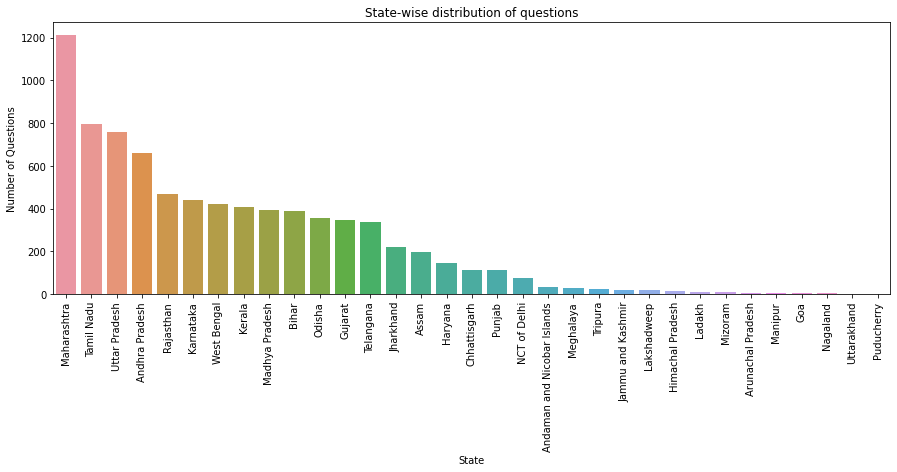

In [13]:
# Let's find out which state's MPs have been the most active
questions_state_wise = questions.groupby('state')['state'].agg(['count']).sort_values('count', ascending=False).reset_index()
questions_state_wise.columns = ['State', 'Number of Questions']
plt.figure(figsize=(15, 5))
plt.title('State-wise distribution of questions')
sns.barplot(x='State', y='Number of Questions', data=questions_state_wise)
plt.xticks(rotation=90)
plt.show()

In [14]:
# Are bigger states therefore more "active" in asking questions in the Lok Sabha?
# Not quite. Recall that not each state has an equal number of representatives in the Lok Sabha.
# Let's try to calculate the activity score of a state as : Number of questions from the state / Number of constituencies in the state

# Load members state, constituency info
members = pd.read_csv("/kaggle/input/lok-sabha-questions/members.csv")

# Find number of members from each State
state_counts = members.groupby('State')['State'].count().to_dict()

# Map state_counts to questions_state_wise
questions_state_wise['Number of MPs'] = questions_state_wise['State'].map(state_counts)

# Check out state wise questions now
questions_state_wise.head()

State  Number of Questions  Number of MPs
0     Maharashtra                 1211             48
1      Tamil Nadu                  798             39
2   Uttar Pradesh                  761             80
3  Andhra Pradesh                  659             25
4       Rajasthan                  468             25

In [15]:
questions_state_wise['State MP Activity Score'] = questions_state_wise['Number of Questions'] / questions_state_wise['Number of MPs']
questions_state_wise.head()

State  Number of Questions  Number of MPs  State MP Activity Score
0     Maharashtra                 1211             48                25.229167
1      Tamil Nadu                  798             39                20.461538
2   Uttar Pradesh                  761             80                 9.512500
3  Andhra Pradesh                  659             25                26.360000
4       Rajasthan                  468             25                18.720000

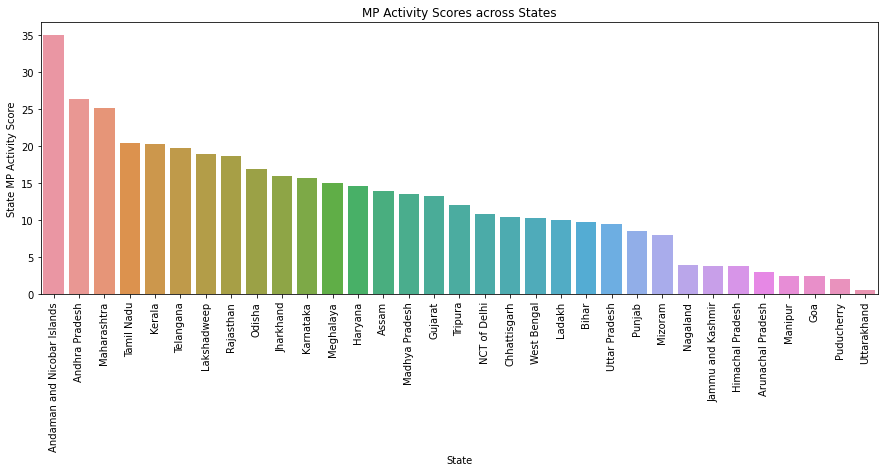

In [16]:
# Let's finally find out which state's MPs have been the most active
questions_state_wise = questions_state_wise.sort_values('State MP Activity Score', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('MP Activity Scores across States')
sns.barplot(x='State', y='State MP Activity Score', data=questions_state_wise)
plt.xticks(rotation=90)
plt.show()

In [17]:
# What's up with Andaman and Nicobar Islands?
questions[questions['state']=='Andaman and Nicobar Islands'][['id', 'from', 'to', 'topic']]

id                      from  \
41       5  Sharma, Shri Kuldeep Rai   
387    205  Sharma, Shri Kuldeep Rai   
417    210  Sharma, Shri Kuldeep Rai   
552    240  Sharma, Shri Kuldeep Rai   
895    419  Sharma, Shri Kuldeep Rai   
902    421  Sharma, Shri Kuldeep Rai   
1094   491  Sharma, Shri Kuldeep Rai   
1133   517  Sharma, Shri Kuldeep Rai   
1229   592  Sharma, Shri Kuldeep Rai   
1384   671  Sharma, Shri Kuldeep Rai   
1489   703  Sharma, Shri Kuldeep Rai   
1553   734  Sharma, Shri Kuldeep Rai   
1908   927  Sharma, Shri Kuldeep Rai   
2101   991  Sharma, Shri Kuldeep Rai   
2321  1117  Sharma, Shri Kuldeep Rai   
2520  1187  Sharma, Shri Kuldeep Rai   
2822   121  Sharma, Shri Kuldeep Rai   
3183  1588  Sharma, Shri Kuldeep Rai   
3205  1597  Sharma, Shri Kuldeep Rai   
3285  1615  Sharma, Shri Kuldeep Rai   
3356  1650  Sharma, Shri Kuldeep Rai   
3716  1881  Sharma, Shri Kuldeep Rai   
3997  2056  Sharma, Shri Kuldeep Rai   
4102  2079  Sharma, Shri Kuldeep Rai   
4148  2099  Sharma, Shri Kuldeep Rai   
4478  2296  Sharma, Shri Kuldeep Rai   
4636  2347  Sharma, Shri Kuldeep Rai   
4994  2544  Sharma, Shri Kuldeep Rai   
5109  2604  Sharma, Shri Kuldeep Rai   
5408  2781  Sharma, Shri Kuldeep Rai   
5826  3029  Sharma, Shri Kuldeep Rai   
6737  3532  Sharma, Shri Kuldeep Rai   
7022  3710  Sharma, Shri Kuldeep Rai   
7413  3943  Sharma, Shri Kuldeep Rai   
7724  4158  Sharma, Shri Kuldeep Rai   

                                                  to  \
41            ENVIRONMENT, FOREST AND CLIMATE CHANGE   
387                                        EDUCATION   
417                            LABOUR AND EMPLOYMENT   
552                  AGRICULTURE AND FARMERS WELFARE   
895                   SOCIAL JUSTICE AND EMPOWERMENT   
902                         YOUTH AFFAIRS AND SPORTS   
1094  CONSUMER AFFAIRS, FOOD AND PUBLIC DISTRIBUTION   
1133                                        RAILWAYS   
1229          ELECTRONICS AND INFORMATION TECHNOLOGY   
1384                                        TEXTILES   
1489                       PETROLEUM AND NATURAL GAS   
1553                                  CIVIL AVIATION   
1908                     WOMEN AND CHILD DEVELOPMENT   
2101                       HEALTH AND FAMILY WELFARE   
2321                       HEALTH AND FAMILY WELFARE   
2520                                       EDUCATION   
2822                               RURAL DEVELOPMENT   
3183                  SOCIAL JUSTICE AND EMPOWERMENT   
3205        FISHERIES, ANIMAL HUSBANDRY AND DAIRYING   
3285                           COMMERCE AND INDUSTRY   
3356                                        RAILWAYS   
3716                       PETROLEUM AND NATURAL GAS   
3997                     ROAD TRANSPORT AND HIGHWAYS   
4102                       HEALTH AND FAMILY WELFARE   
4148                       HEALTH AND FAMILY WELFARE   
4478                     WOMEN AND CHILD DEVELOPMENT   
4636                                       EDUCATION   
4994                 AGRICULTURE AND FARMERS WELFARE   
5109                 AGRICULTURE AND FARMERS WELFARE   
5408                                        TEXTILES   
5826                                  CIVIL AVIATION   
6737                                       EDUCATION   
7022        FISHERIES, ANIMAL HUSBANDRY AND DAIRYING   
7413                                  COMMUNICATIONS   
7724             MICRO, SMALL AND MEDIUM ENTERPRISES   

                                                  topic  
41                       Ban  on  single  use  plastics  
387                                        Shiksha Parv  
417                  India’s National Employment Policy  
552             Crop Loss due to Heavy Rains and Floods  
895                          Implementation of PM-DAKSH  
902                              National Sports Awards  
1094                                 Data on Edible Oil  
1133                           Enhance Freight Earnings  
1229                        

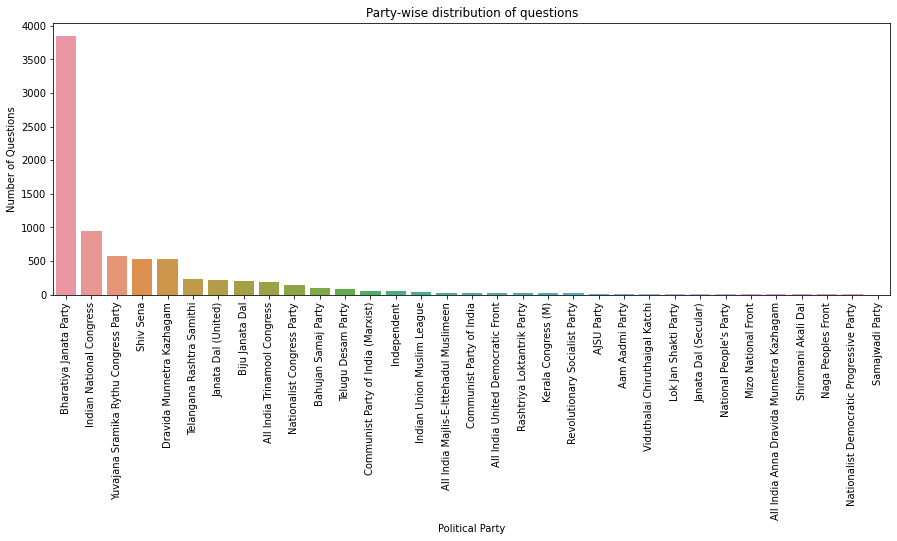

In [18]:
# Considering the political affiliation of the MPs, how many questions were contributed by members from a particular party?
questions_party_wise = questions.groupby('party')['party'].agg(['count']).sort_values('count', ascending=False).reset_index()
questions_party_wise.columns = ['Political Party', 'Number of Questions']
plt.figure(figsize=(15, 5))
plt.title('Party-wise distribution of questions')
sns.barplot(x='Political Party', y='Number of Questions', data=questions_party_wise)
plt.xticks(rotation=90)
plt.show()

In [19]:
# This graph isn't surprising. Need to formulate a Party MP Activity Score for better insights
# Find number of members from each Party
party_counts = members.groupby('Party')['Party'].count().to_dict()

# Map party_counts to questions_party_wise
questions_party_wise['Number of MPs'] = questions_party_wise['Political Party'].map(party_counts)

# Check out party wise questions now
questions_party_wise.head()

Political Party  Number of Questions  Number of MPs
0                 Bharatiya Janata Party                 3849            301
1               Indian National Congress                  951             53
2  Yuvajana Sramika Rythu Congress Party                  582             22
3                              Shiv Sena                  537             19
4              Dravida Munnetra Kazhagam                  529             24

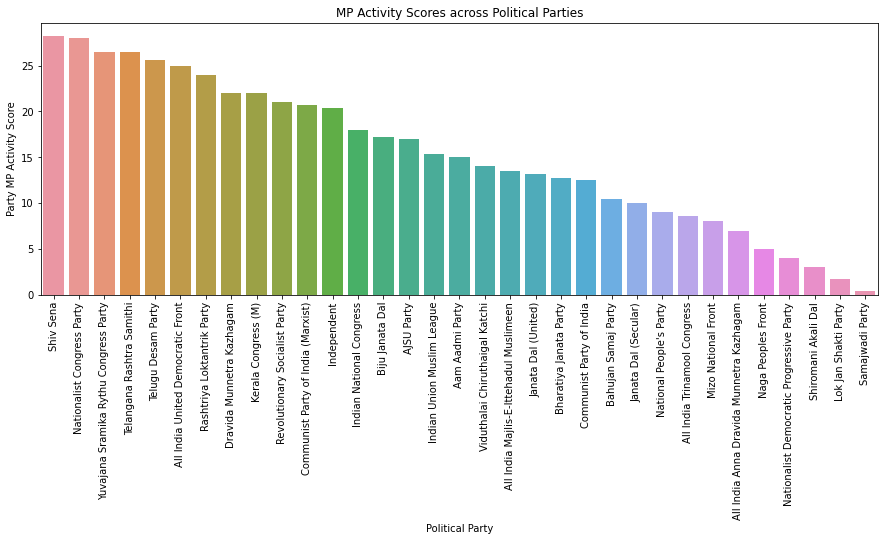

In [20]:
# Calculate Party MP Activity Score
questions_party_wise['Party MP Activity Score'] = questions_party_wise['Number of Questions'] / questions_party_wise['Number of MPs']

# Let's finally find out which party's MPs have been the most active
questions_party_wise = questions_party_wise.sort_values('Party MP Activity Score', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('MP Activity Scores across Political Parties')
sns.barplot(x='Political Party', y='Party MP Activity Score', data=questions_party_wise)
plt.xticks(rotation=90)
plt.show()

## The curious case of Shri Sunil Kumars
* Mapping the Asking Member to an actual Member of Parliament was a difficult task. For e.g., consider the following names:
  - Shri Sunil Kumar Singh
  - Shri S.K. Singh
  - Shri Sunil Singh
  - *Singh, Shri Sunil Kumar*
  - Singh, Sunil Kumar
  - Singh, Sunil K.
* These are all valid ways to write a name. Which one do we stick to? I choose to go with the full name approach with Last Name, First Name. Fuzzy-matching of Indian names was a difficult task, but it worked out well, thanks mostly to [thefuzz](https://github.com/seatgeek/thefuzz).
* Btw, interestingly, we currently have *FIVE* Shri Sunil Kumar's as MPs:


| Member Name | Party | Constituency |
| --- | --- | --- |
| Mondal, Shri Sunil Kumar | All India Trinamool Congress	| Bardhaman Purba (SC)(West Bengal) |
| Singh, Shri Sunil Kumar	| Bharatiya Janata Party	| Chatra (Jharkhand) |
| Soni, Shri Sunil Kumar	| Bharatiya Janata Party	| Raipur (Chhattisgarh) |
| Sunil Kumar Pintu, Shri	| Janata Dal (United)	| Sitamarhi (Bihar) |
| Kumar, Shri Sunil	| Janata Dal (United)	| Valmiki Nagar (Bihar) |

* Would be interesting to see how all the Shri Sunil Kumars stack up against each other

In [21]:
# Collect all questions
questions_sunil = questions[questions['from'].str.contains('Sunil') & questions['from'].str.contains('Kumar')][['from', 'to', 'topic', 'contents']]
questions_sunil

from                                      to  \
67     Singh, Shri Sunil Kumar                                 CULTURE   
256     Soni, Shri Sunil Kumar  SKILL DEVELOPMENT AND ENTREPRENEURSHIP   
325    Sunil Kumar Pintu, Shri                   LABOUR AND EMPLOYMENT   
738    Singh, Shri Sunil Kumar            INFORMATION AND BROADCASTING   
831    Sunil Kumar Pintu, Shri          SOCIAL JUSTICE AND EMPOWERMENT   
...                        ...                                     ...   
7578   Singh, Shri Sunil Kumar                                RAILWAYS   
7641  Mondal, Shri Sunil Kumar                                RAILWAYS   
7706  Mondal, Shri Sunil Kumar     MICRO, SMALL AND MEDIUM ENTERPRISES   
7836   Singh, Shri Sunil Kumar               HOUSING AND URBAN AFFAIRS   
7851   Singh, Shri Sunil Kumar               PETROLEUM AND NATURAL GAS   

                                        topic  \
67                   Aazadi Ka Amrit Mahotsav   
256                       Skill  Loan  Scheme   
325           Labourers of Unorganised Sector   
738   Celebration of Azadi Ka Amrit Mahotsava   
831                              EWS in Bihar   
...                                       ...   
7578                    Railway Line Projects   
7641                  Development of Railways   
7706                        Schemes for MSMEs   
7836              Funds to Urban Local Bodies   
7851                   New Oil Terminal/Depot   

                                               contents  
67    Will the Minister of CULTURE be pleased to sta...  
256   Will the Minister of SKILL DEVELOPMENT AND ENT...  
325   Will the Minister of LABOUR AND EMPLOYMENT be ...  
738   Will the Minister of INFORMATION AND BROADCAST...  
831   Will the Minister of SOCIAL JUSTICE AND EMPOWE...  
...                                                 ...  
7578  Will the Minister of RAILWAYS be pleased to st...  
7641  Will the Minister of RAILWAYS be pleased to st...  
7706  Will the Minister of MICRO, SMALL AND MEDIUM E...  
7836  Will the Minister of HOUSING AND URBAN AFFAIRS...  
7851  Will the Minister of PETROLEUM AND NATURAL GAS...  

[90 rows x 4 columns]

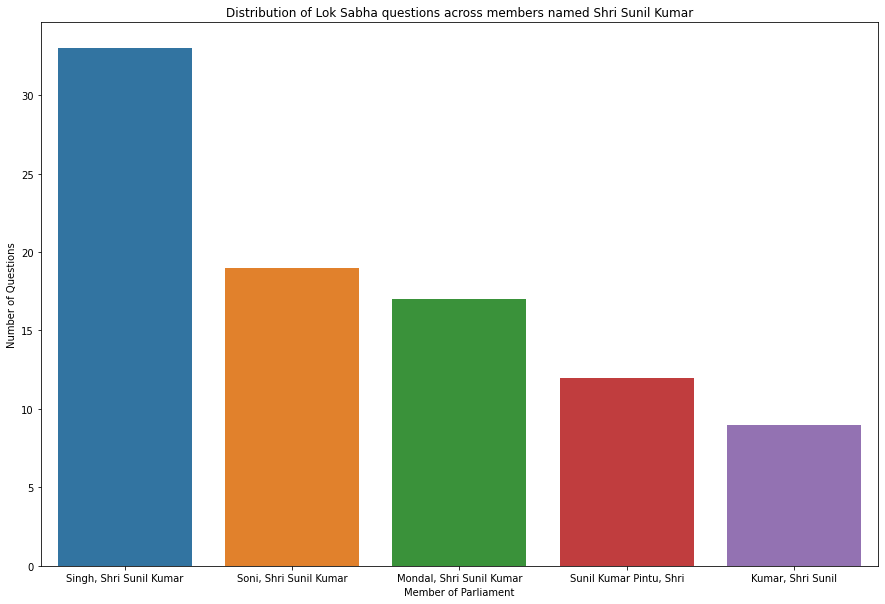

In [22]:
# Grouping these by 'from'
questions_sunil_wise = questions_sunil.groupby('from')['from'].agg(['count']).sort_values('count', ascending=False).reset_index()
questions_sunil_wise.columns = ['Member of Parliament', 'Number of Questions']
plt.figure(figsize=(15, 10))
plt.title('Distribution of Lok Sabha questions across members named Shri Sunil Kumar')
sns.barplot(x='Member of Parliament', y='Number of Questions', data=questions_sunil_wise)
plt.show()

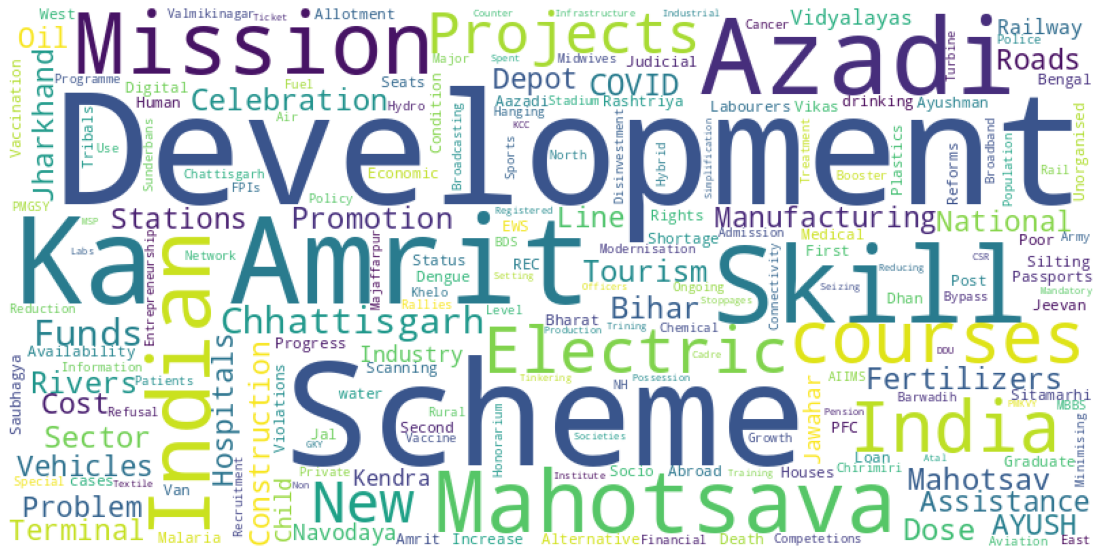

In [23]:
# Here's a visualization of issues that Shri Sunil Kumars are talking about
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Collect all text from topics of questions asked by Shri Sunil Kumars
topics_text = " ".join(t for t in questions_sunil.topic.to_list())

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(topics_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [24]:
# Here's a helper function for visualization of issues
def create_topic_wordcloud(questions):
    topics_text = " ".join(t for t in questions.topic.to_list())

    stopwords = set(STOPWORDS)
    stopwords.update(["India", "Indian", "Bharat"])
    wordcloud = WordCloud(background_color="white", stopwords=stopwords, width=800, height=400).generate(topics_text)
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

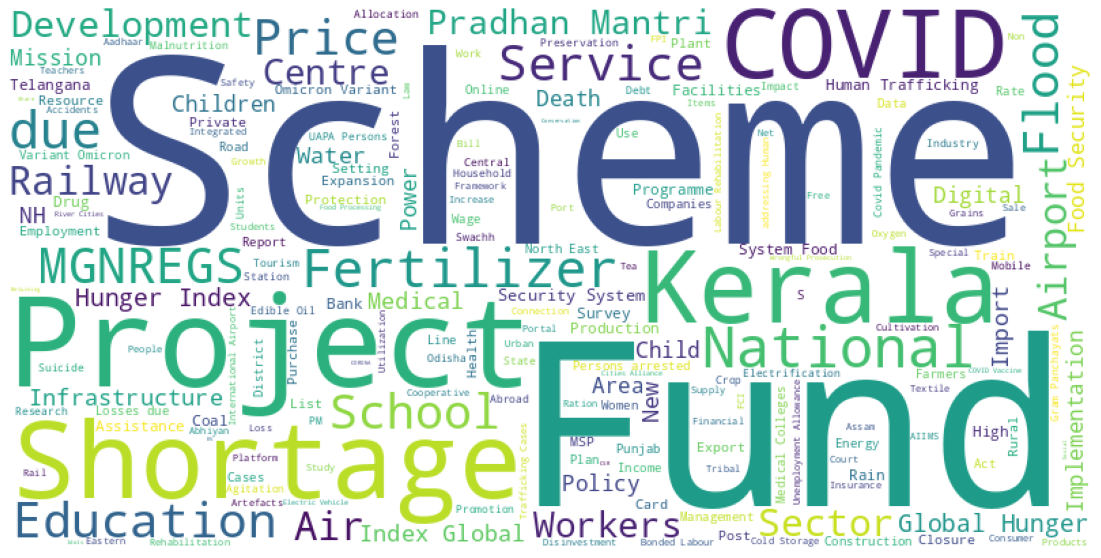

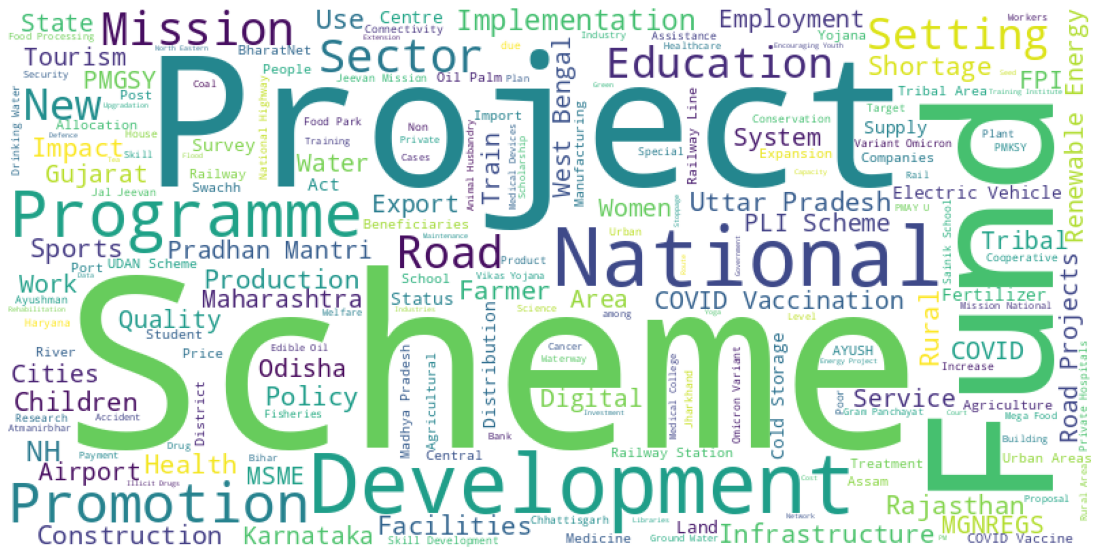

In [25]:
# Contrasting INC and BJP's issues
create_topic_wordcloud(questions[questions.party=='Indian National Congress'])
create_topic_wordcloud(questions[questions.party=='Bharatiya Janata Party'])

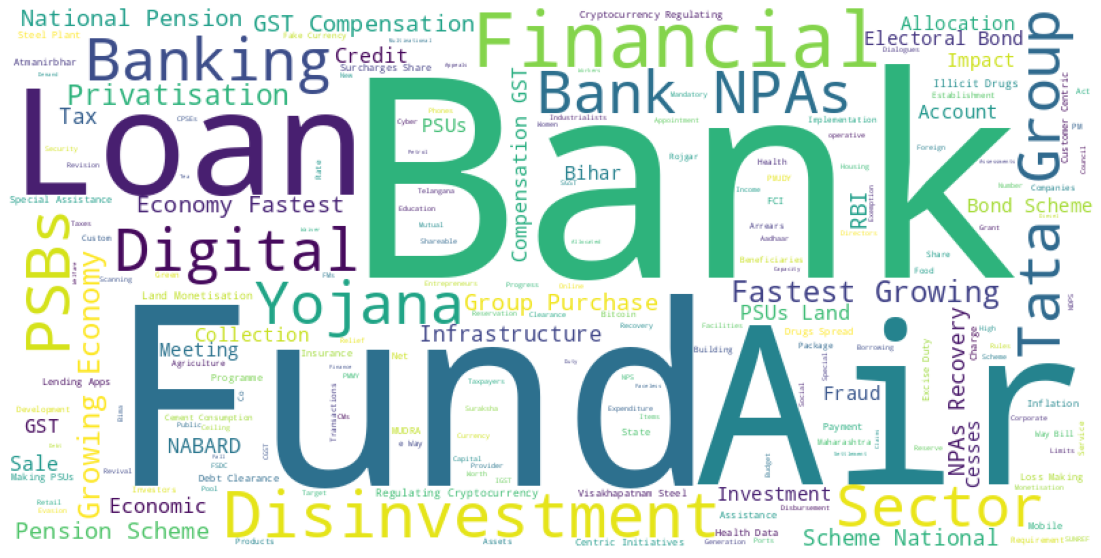

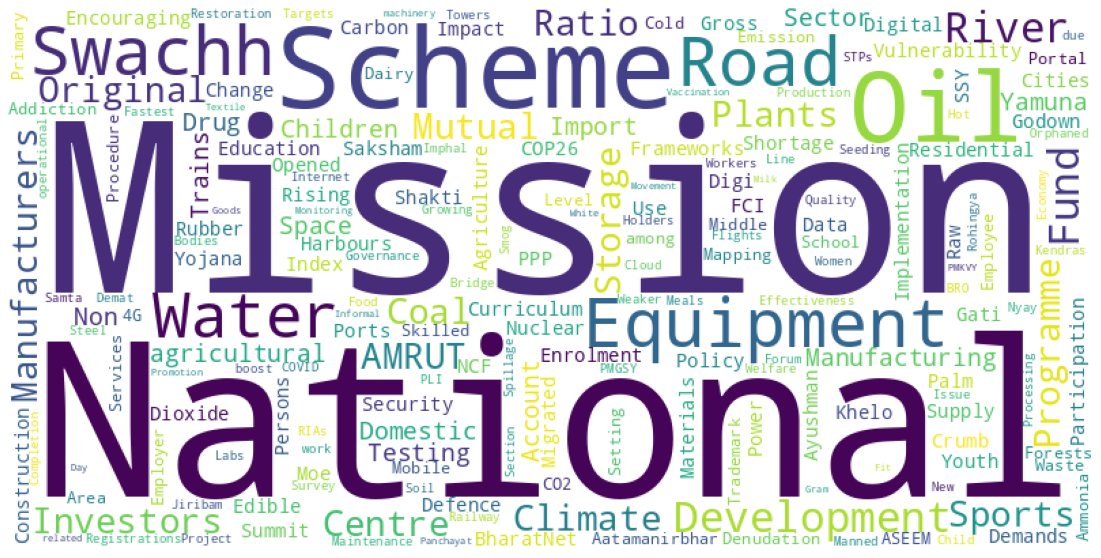

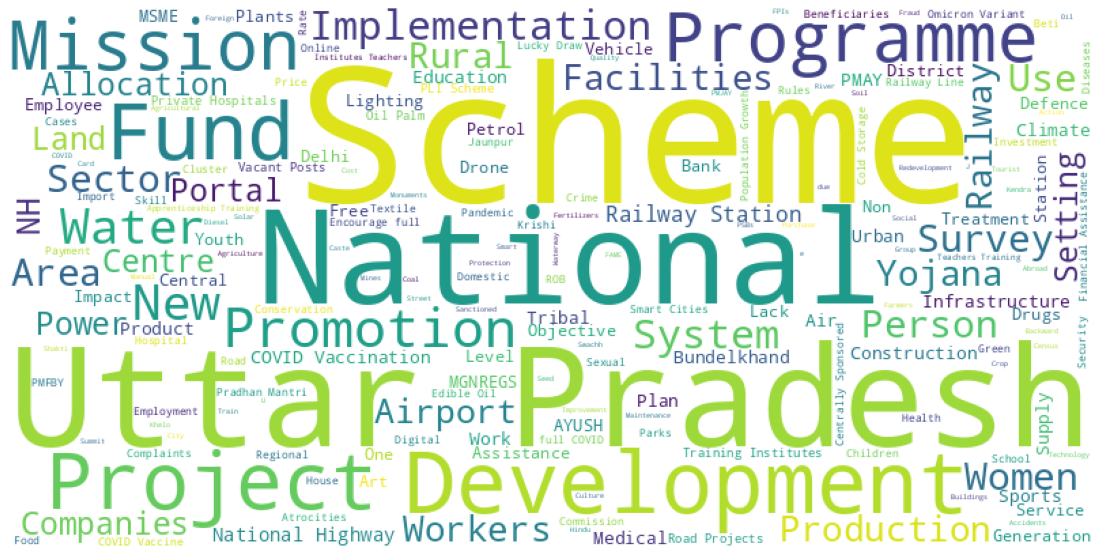

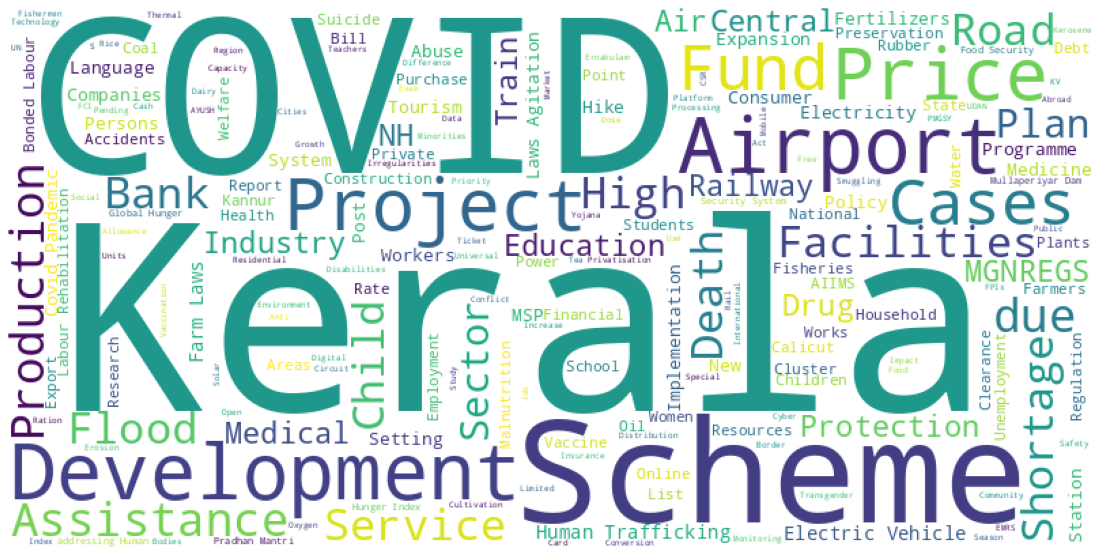

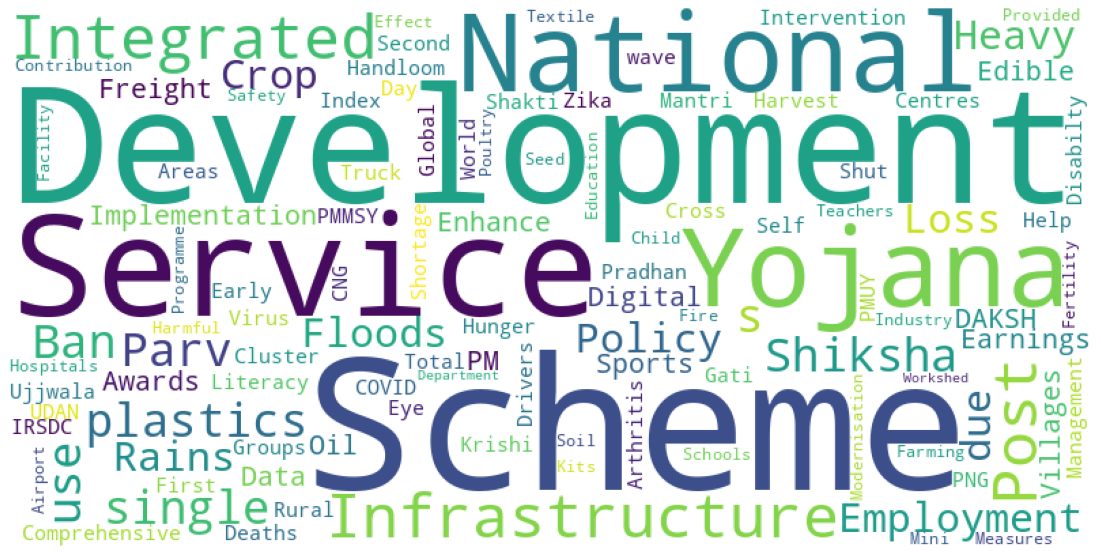

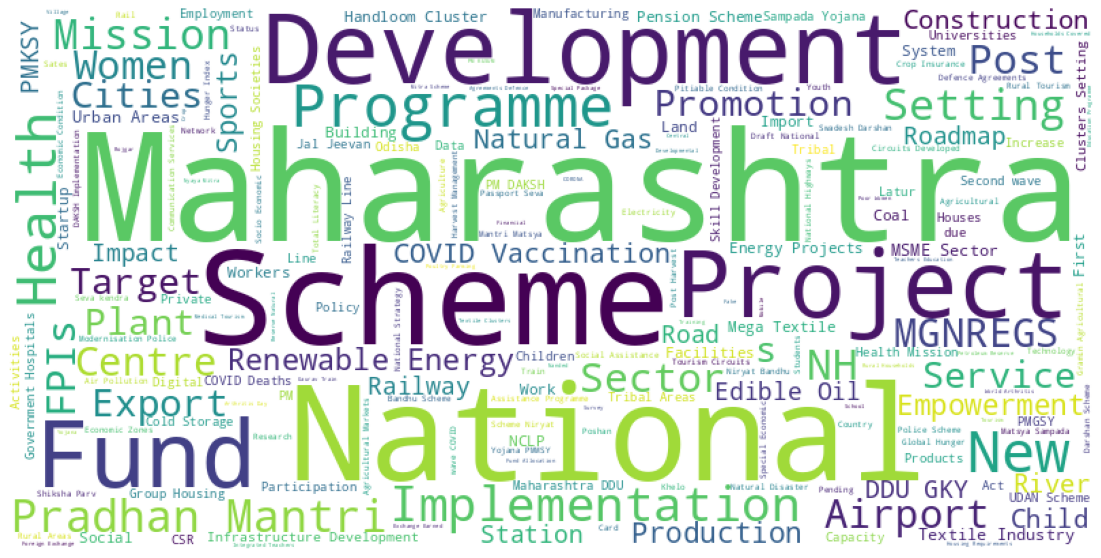

In [26]:
create_topic_wordcloud(questions[questions['to'].str.contains("Finance", case=False)])
create_topic_wordcloud(questions[questions.state.str.contains("Delhi")])
create_topic_wordcloud(questions[questions.state.str.contains("Uttar Pradesh")])
create_topic_wordcloud(questions[questions.state.str.contains("Kerala")])
create_topic_wordcloud(questions[questions.state.str.contains("Andaman")])
create_topic_wordcloud(questions[questions.state.str.contains("Maharashtra")])